# Advertising Impact on Sales Analysis

In this data science project, we embark on an exploration of the advertising landscape to uncover the impact of modern marketing strategies on sales. Our dataset captures key metrics related to advertising spending and resulting sales figures, providing a comprehensive view of the dynamics between advertising investments and business outcomes.

## Dataset Overview

The dataset comprises five crucial columns:

- **Digital:** Reflects advertising spending on digital platforms.
- **Social Media:** Captures investments in marketing across various social media channels.
- **Influencer Marketing:** Highlights expenditures on collaborations with influencers.
- **Sales:** Represents the consequential sales generated as a result of the advertising strategies.
- **Authenticity:** A boolean indicator of the perceived authenticity of advertising.

## Objectives

Our primary objectives include:

1. **Understanding Spending Patterns:** Analyzing how investments in Digital, Social Media, and Influencer Marketing, as well as the perceived authenticity of advertising, correlate with one another and identifying potential trends.

2. **Impact on Sales:** Investigating the relationship between advertising spending, including the authenticity factor, and the resulting sales figures to discern the effectiveness of each strategy.

3. **Informing Marketing Strategies:** Deriving insights to guide future marketing strategies, potentially optimizing the allocation of resources across different advertising channels.

## Exploratory Analysis

To commence our exploration, we'll examine the dataset's structure, visualize the distribution of key variables, and conduct correlation analyses to uncover initial insights. Let's embark on this journey into the ever-evolving landscape of advertising.




In [29]:
#library
import pandas as pd 
import numpy as np

In [30]:
# Read data and print shape
DATA_PATH = '../data/raw/data.csv'
df=pd.read_csv(DATA_PATH)
df.shape

(300, 5)

In [31]:
# Read data
df.head()

,Digital,Social_Media,Influencer_Marketing,Sales,Authenticity
0,112.362036,2.584086,16.893506,68.288547,False
1,285.214292,26.567732,27.859034,131.256131,True
2,219.598183,27.031756,17.701048,138.996297,True
3,179.597545,31.871495,8.870253,95.136105,True
4,46.805592,36.304567,12.063587,23.828325,False


In [32]:
# Read data and print shape
df.sample(1).iloc[0]

Digital                 150.791128
Social_Media             49.985884
Influencer_Marketing     45.243952
Sales                   106.510164
Authenticity                  True
Name: 231, dtype: object

In [33]:
# Print the general information of the data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Digital               300 non-null    float64
 1   Social_Media          300 non-null    float64
 2   Influencer_Marketing  300 non-null    float64
 3   Sales                 300 non-null    float64
 4   Authenticity          300 non-null    bool   
dtypes: bool(1), float64(4)
memory usage: 9.8 KB


In [34]:
# Get stats for the data
df.describe()

,Digital,Social_Media,Influencer_Marketing,Sales
count,300.000000,300.000000,300.000000,300.000000
mean,148.561380,25.541575,47.108895,95.015569
std,88.302162,15.129518,28.342748,48.364662
min,1.518475,0.541883,0.463202,-26.983426
25%,71.724241,12.480746,20.976653,58.003503
50%,153.515319,26.085139,45.286418,97.155725
75%,227.057885,38.667102,71.698831,130.206926
max,297.016155,49.985884,99.687425,205.349237


In [35]:
# Converts the boolean 'Authenticity' column to numeric format

def to_numeric(dataframe, col):
  
    dataframe[col] = dataframe[col].astype(int)
    return dataframe 

# We will save a different data frame and leave the data frame untouched
df1 = to_numeric(df,'Authenticity')
df1.to_pickle('../data/raw/df1.pkl')
df1

# Read data

,Digital,Social_Media,Influencer_Marketing,Sales,Authenticity
0,112.362036,2.584086,16.893506,68.288547,0
1,285.214292,26.567732,27.859034,131.256131,1
2,219.598183,27.031756,17.701048,138.996297,1
3,179.597545,31.871495,8.870253,95.136105,1
4,46.805592,36.304567,12.063587,23.828325,0
...,...,...,...,...,...
295,156.672978,23.698082,20.498430,48.390937,1
296,230.998066,33.377887,29.314773,126.025495,1
297,64.746308,8.615994,89.633582,47.346742,0
298,186.867143,9.614451,1.300192,75.714119,0


In [36]:
df1.describe()

,Digital,Social_Media,Influencer_Marketing,Sales,Authenticity
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,148.561380,25.541575,47.108895,95.015569,0.313333
std,88.302162,15.129518,28.342748,48.364662,0.464624
min,1.518475,0.541883,0.463202,-26.983426,0.000000
25%,71.724241,12.480746,20.976653,58.003503,0.000000
50%,153.515319,26.085139,45.286418,97.155725,0.000000
75%,227.057885,38.667102,71.698831,130.206926,1.000000
max,297.016155,49.985884,99.687425,205.349237,1.000000


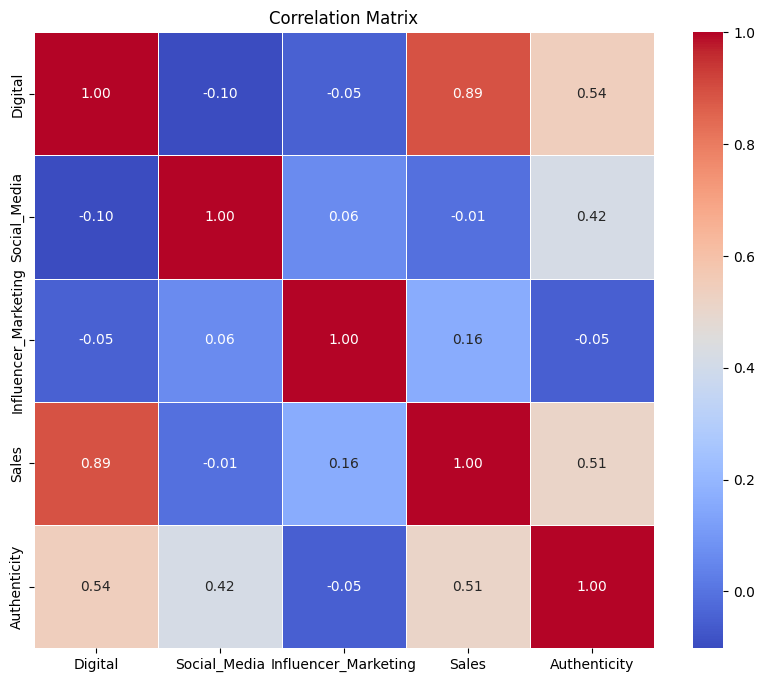

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


## Correlation Findings

- **Digital with Sales:** 0.89
  - There is a strong positive correlation (0.89) between the 'Digital' feature and 'Sales'.
  
- **Authenticity with Sales:** 0.51
  - A moderate positive correlation (0.51) is observed between the 'Authenticity' feature and 'Sales'.
  
- **Digital with Authenticity:** 0.54
  - There is a moderate positive correlation (0.54) between 'Digital' and 'Authenticity'.

- **Social media with Authenticity:** 0.42
  - There is a weak positive correlation (0.42) between 'Social media' and 'Authenticity.'


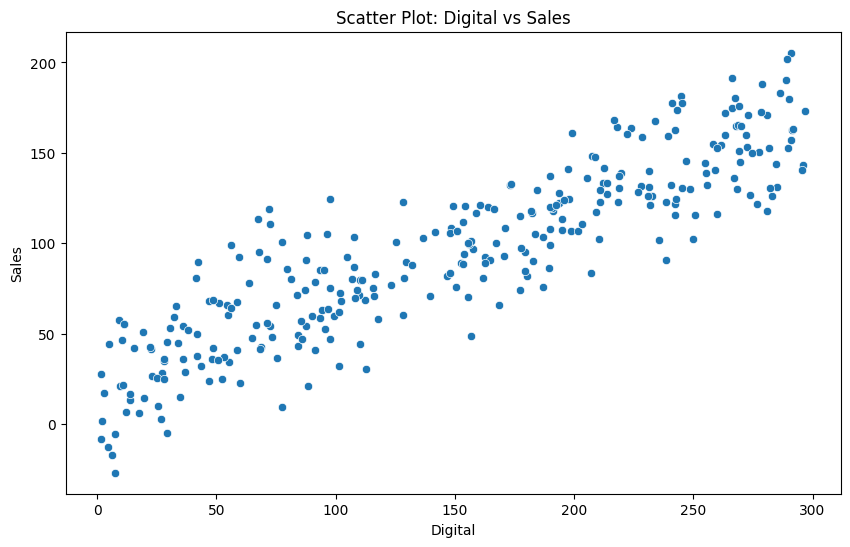

In [38]:
# Scatter Plot: Digital vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Digital', y='Sales', data=df1)
plt.title('Scatter Plot: Digital vs Sales')
plt.show()


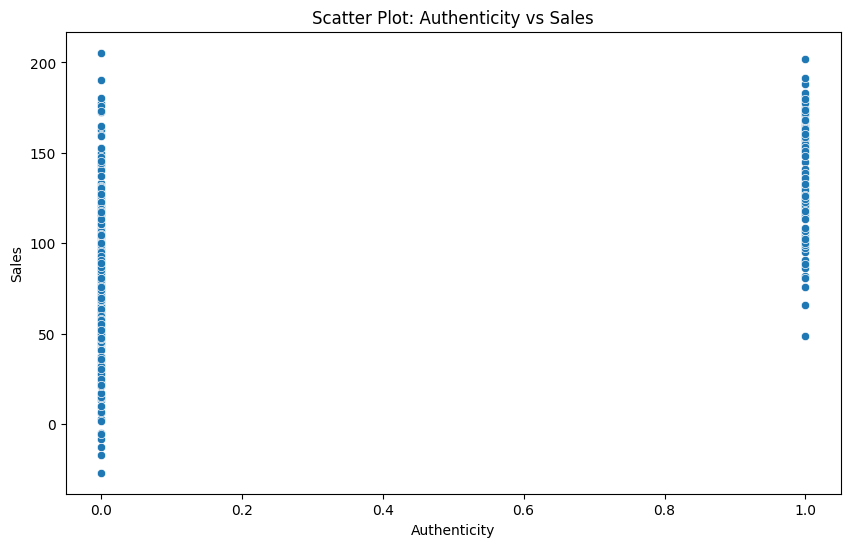

In [39]:
# Scatter Plot: Authenticity vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Authenticity', y='Sales', data=df1)
plt.title('Scatter Plot: Authenticity vs Sales')
plt.show()



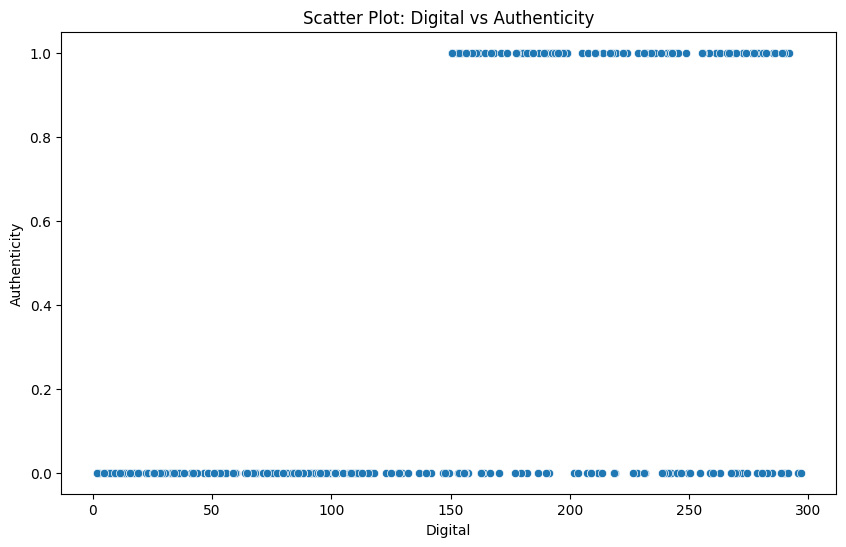

In [40]:
# Scatter Plot: Digital vs Authenticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Digital', y='Authenticity', data=df1)
plt.title('Scatter Plot: Digital vs Authenticity')
plt.show()



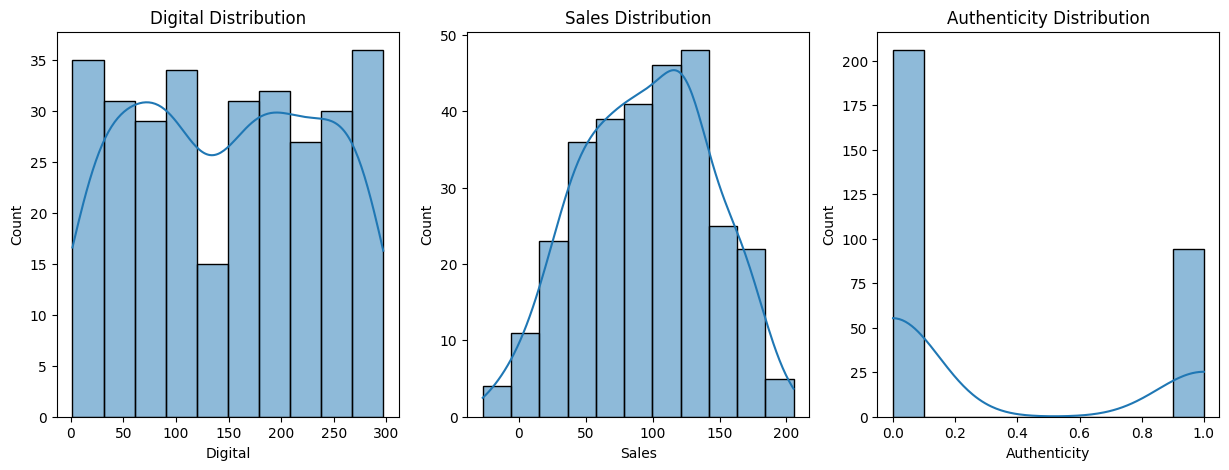

In [41]:
# Distribution Plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df1['Digital'], kde=True)
plt.title('Digital Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df1['Sales'], kde=True)
plt.title('Sales Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df1['Authenticity'], kde=True)
plt.title('Authenticity Distribution')

plt.show()



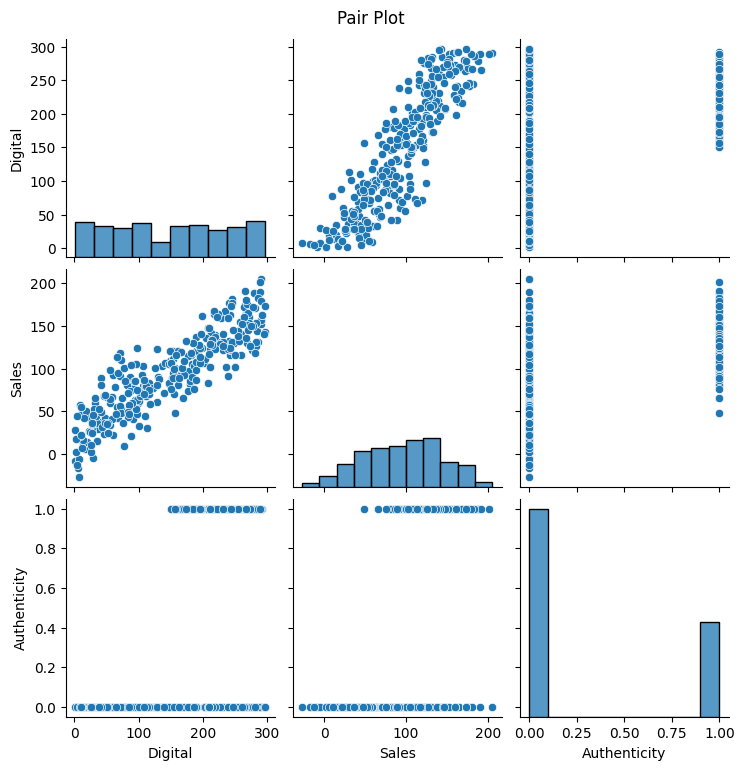

In [42]:
#   
sns.pairplot(df1[['Digital', 'Sales', 'Authenticity']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

